# T values distribution

In [2]:
import pandas as pd
from pathlib import Path
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

project_root = Path().resolve().parents[1]

results_base = project_root / "output" / "ML"

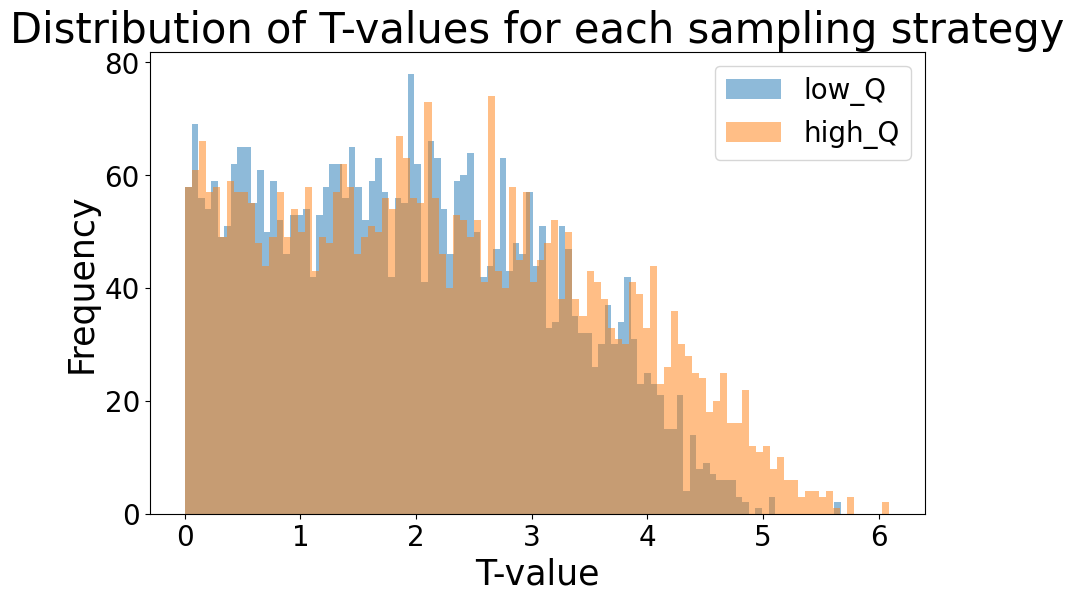

In [6]:
results = pd.DataFrame()
sampling_list = ["low_Q", "high_Q"]
age_bins = 10
random_q_repetitions = 20
results_dir = project_root / "output" / "statistics/"

# Initialize a dictionary to store T-values for each sampling strategy
t_values_dict = {}

# Read and store T-values for each sampling strategy
for sampling in sampling_list:
    results_sampling = pd.read_csv(
        results_dir
        / (
            "statistic_test_"
            + str(age_bins)
            + "_bins_sampling_"
            + sampling
            + "_5_sites.csv"
        ),
        index_col=0,
    )  # noqa
    t_values_dict[sampling] = np.abs(results_sampling["t-stat"])

# # Read and store T-values for the random distribution
# sampling = "random_Q"
# results_sampling = pd.read_csv(project_root + results_dir + "statistic_test_" + str(age_bins) + "bins_" + str(random_q_repetitions) + "repeated_random_sampling_5_sites.csv", index_col=0)  # noqa
# t_values_dict[sampling] = results_sampling["t-stats"]

# Plotting the T-value distributions
plt.figure(figsize=(10, 6))
for sampling, t_values in t_values_dict.items():
    plt.hist(t_values, bins=100, alpha=0.5, label=sampling)

plt.xlabel("T-value")
plt.ylabel("Frequency")
plt.title("Distribution of T-values for each sampling strategy")
plt.legend()
plt.show()
# %%
